# (1.) โหลดข้อมูล Iris และ ตรวจสอบข้อมูลเบื้องต้น

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris') #โหลดข้อมูลจากเน็ต
df.head() # ดูข้อมูลตัวอย่าง 5 แถวบวก

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


ตรวจดูข้อมูล ว่ามีข้อมูลสูญหายหรือไม่(Missing Data)

In [ ]:
df.isnull().sum() # จะพบว่าทุกตัวเป็นศูนย์ หมายถึงไม่มีข้อมูลสูญหาย

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

plot ดูขนาดกลีบ Sepal (กลุ่มข้อมุลของ sepal_length และ sepal_width) โดยสั่ง plot แยกสีจุดข้อมูลตามสายพันธุ์(species) หมายถึง จุดข้อมูลดอกพันธุ์หนึ่งก็ใช้สีหนึ่ง เช่น Setosa สีแดง Virginica สีเขียว...

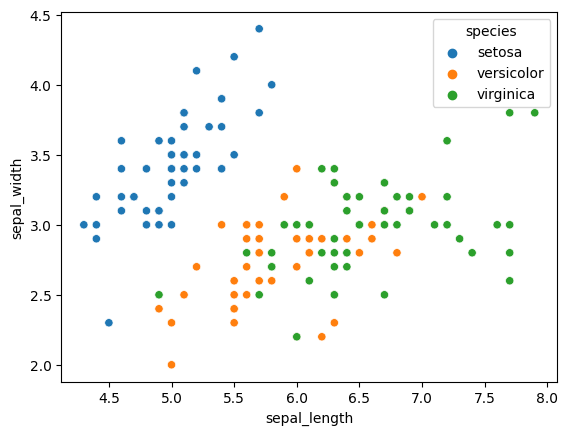

In [ ]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species') # plot จุดแยกสี
plt.show()

จะพพบว่า กลุ่มข้อมูลขนาดกลีบSepal ของSetosa แยกจาก Versicolor และ Verginica อย่างชัดเจน เนื่องจากขนาดของกลีบดอก Setosa มีขนาดเล็กกว่า
กลุ่มจุดข้อมูลขนาดกลีบ Sepal ของ Versicolor และ Verginica มีการเหลื่อมกันอยู่ เนื่องจากกลีบ Sepal มีขนาดใกล้เคียงกัน

plot ดูขนาดกลีบPetal (กลุ่มข้อมุลของ petal_length และ petal_width) แยกสีจุดข้อมูลตามสายพันธุ์(species)

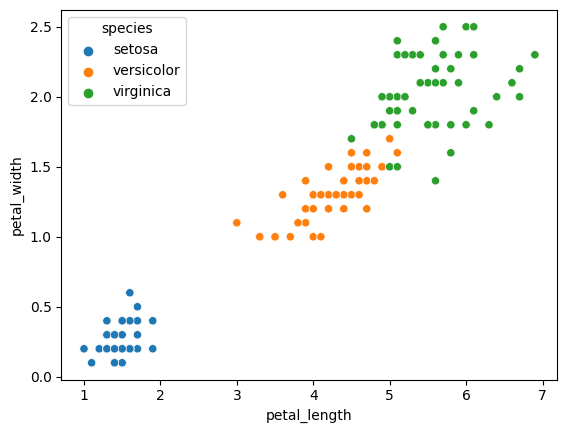

In [ ]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species') # plot จุดแยกสี
plt.show()

ในการคัดแยกสายพันธุ์ดอกไม้ ใช้petalดีกว่าseal เนื่องจากเหลื่อมกันน้อยกว่า ความแม่นยำของระบบที่ได้จะมีมากกว่า

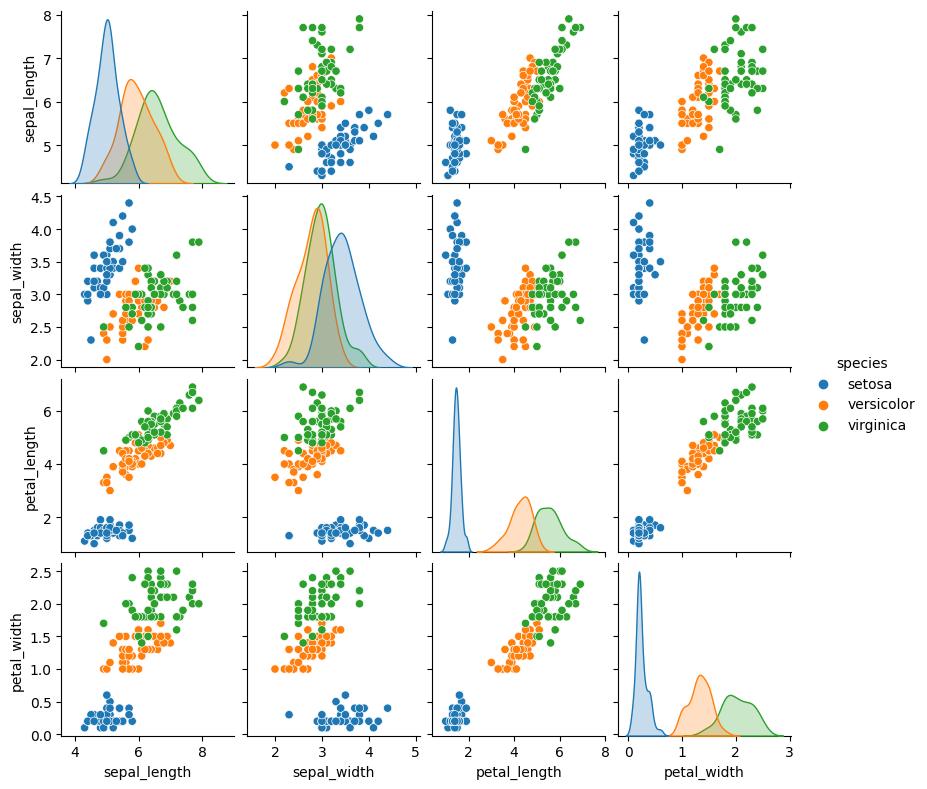

In [ ]:
sns.pairplot(df,hue='species', height=2.0)
plt.show()

# (2.) เตรียมข้อมูล Feature และ Label

feature data วิธีที่1

In [ ]:
x = df.drop('species', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


feature data วิธีที่2

In [ ]:
feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
x = df[feature_cols]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


label data

In [ ]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

ตรวจดูมิติ x,y

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

จำนวนแถว ต้องเท่ากัน คือ 150 แถว

# (3.) Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  # train 70%, test 30%

ดูจำนวนข้อมูลของ Train, Test

In [ ]:
x_train.shape

(105, 4)

In [ ]:
y_test.shape

(45,)

ดูจำนวน test set ว่ามีจำนวนสายพันธุ์ อย่างละเท่าไหร่

In [ ]:
import numpy as np
(label, count) = np.unique(y_test, return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 18]
 ['versicolor' 14]
 ['virginica' 13]]


อาจจะได้ไม่เท่าเดิมในทุกครั้งที่run เพราะเป็นการสุ่ม

# (4.) สร้าง Model และ Evalute

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

เรียกใช้อัลกอ SVM เป็น model แล้วเอา train data ไปเทรนในโมเดล

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

เทียบดู labelของจริง(actual) กับ labelที่ทำนายไว้(predict)



In [ ]:
import pandas as pd

y_pred = model.predict(x_test)
print(y_pred, y_test.array)

['versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'versicolor'] <PandasArray>
['versicolor', 'versicolor',  'virginica',     'setosa', 'versicolor',
  'virginica', 'versicolor',     'setosa',  'virginica',  'virginica',
  'virginica',     'setosa', 'versicolor',     'setosa',  'virginica',
 'versicolor',  'virginica',     'setosa',  'virginica', 'versicolor',
     'setosa',  'virginica', 'versicolor', 'versicolor',     'setosa',
  'virginica',     'setosa',  'virginica',     'setosa', 'versicolor',
     'setosa', 'versicolor',     'setosa',     'seto

ดู confuse matrix

In [ ]:
print('Accuracy Score: {:4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cnn = confusion_matrix(y_test, y_pred)
cnn

Accuracy Score: 0.977778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



array([[18,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 13]])